In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.image import resize

train_df = pd.read_csv('C:/Users/nagen/Downloads/DL_Project/SignNet_Train.csv')
test_df = pd.read_csv('C:/Users/nagen/Downloads/DL_Project/SignNet_Test.csv')

label_to_alphabet = { 0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M',
                     13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y' }

def preprocess_data(df):
    X = df.drop(columns=['label']).values
    y = df['label'].values
    X = X / 255.0
    X = X.reshape(-1, 28, 28, 1)
    y = to_categorical(y, num_classes=25)
    return X, y

X_train, y_train = preprocess_data(train_df)
X_test, y_test = preprocess_data(test_df)

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

def SignNet():
    model = Sequential()
    
    model.add(Input(shape=(28, 28, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.6))
    model.add(Dense(25, activation='softmax'))

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

model = SignNet()

train_dataset = datagen.flow(X_train, y_train, batch_size=64)

history = model.fit(train_dataset,
                    validation_data=(X_val, y_val),
                    epochs=25,
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 105s 166ms/step - accuracy: 0.3463 - loss: 2.8242 - val_accuracy: 0.1712 - val_loss: 3.6888 - learning_rate: 0.0010
Epoch 2/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 53s 151ms/step - accuracy: 0.8120 - loss: 0.8784 - val_accuracy: 0.8472 - val_loss: 0.7021 - learning_rate: 0.0010
Epoch 3/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 53s 149ms/step - accuracy: 0.9064 - loss: 0.5704 - val_accuracy: 0.9479 - val_loss: 0.4118 - learning_rate: 0.0010
Epoch 4/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 51s 145ms/step - accuracy: 0.9468 - loss: 0.4312 - val_accuracy: 0.9803 - val_loss: 0.3194 - learning_rate: 0.0010
Epoch 5/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 55s 156ms/step - accuracy: 0.9597 - loss: 0.3734 - val_accuracy: 0.9918 - val_loss: 0.2607 - learning_rate: 0.0010
Epoch 6/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 33s 92ms/step - accuracy: 0.9680 - loss: 0.3326 - val_accuracy: 0.9940 - val_loss: 0.2383 - learning_rate: 0.0010
Epoch 7/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 44s 127ms/step - accuracy: 0.9

In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         6,425 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 400,205 (1.53 MB)

 Trainable params: 133,081 (519.85 KB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 266,164 (1.02 MB)

In [4]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9967 - loss: 0.1083
Test accuracy: 0.9962


In [5]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_test, axis=1)

print("Classification Report: ")
print(classification_report(y_true, y_pred_classes))

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       1.00      1.00      1.00       498
           5       1.00      1.00      1.00       247
           6       1.00      0.93      0.97       348
           7       0.99      1.00      0.99       436
           8       1.00      1.00      1.00       288
          10       1.00      1.00      1.00       331
          11       1.00      1.00      1.00       209
          12       1.00      1.00      1.00       394
          13       1.00      1.00      1.00       291
          14       1.00      1.00      1.00       246
          15       0.99      1.00      0.99       347
          16       1.00      1.00      1.00       164
          17    

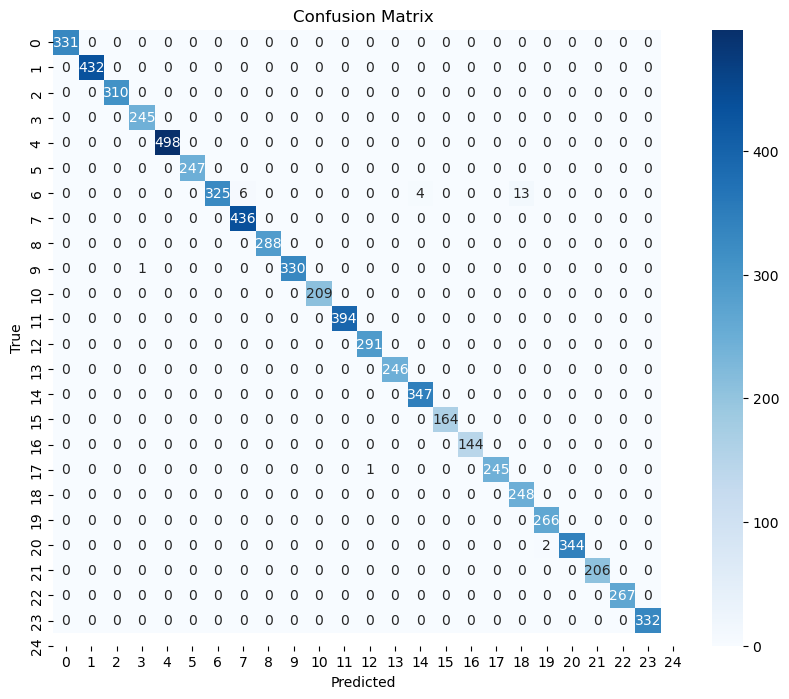

In [6]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(25), yticklabels=np.arange(25))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

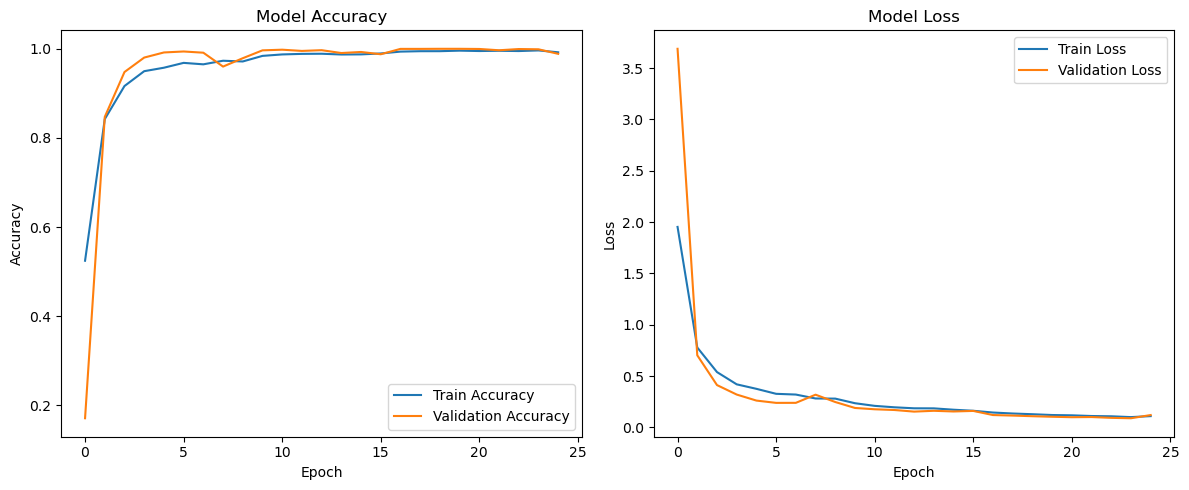

In [7]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


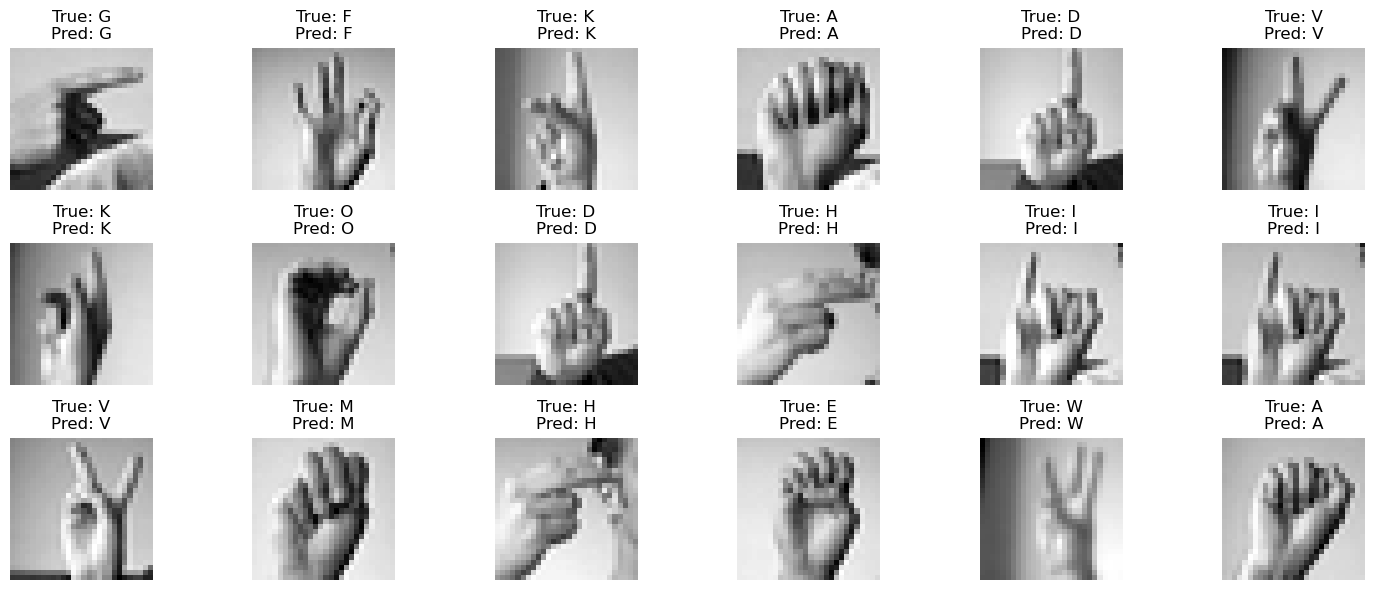

In [8]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

y_pred_labels = [label_to_alphabet[i] for i in y_pred_classes]
y_true_labels = [label_to_alphabet[i] for i in y_true_classes]

def plot_images(X, y_true, y_pred, n=10):
    plt.figure(figsize=(15, 6))
    for i in range(n):
        plt.subplot(3, 6, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title(f"True: {y_true[i]}\nPred: {y_pred[i]}")
    plt.tight_layout()
    plt.show()

plot_images(X_test, y_true_labels, y_pred_labels, n=18)